# Ashkan Ganj 
### 9721973137
### K-means on life expectancy Dataset

## Import essential libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read CSV file with read_csv function of pandas

In [2]:
df = pd.read_csv('./Life Expectancy Data.csv')

show Some of our data

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Remove rows with missed values because of the importance of all features I can't set 0 for missed values so the best way is deleting them

In [5]:
df.dropna(how='any', inplace=True)

Country name is not important because we have other features that reperesent each country

I change the Developing to 1 and Develped to 0 for removing Strings

In [6]:
df.drop(columns='Country', inplace=True)

df.Status = df.Status.map({'Developing': 1, 'Developed': 0})

In [7]:
df.dropna(how='any', inplace=True)

In [8]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(df)


In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics

get algorithm sse for each cluster between 1 to 20

In [12]:
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

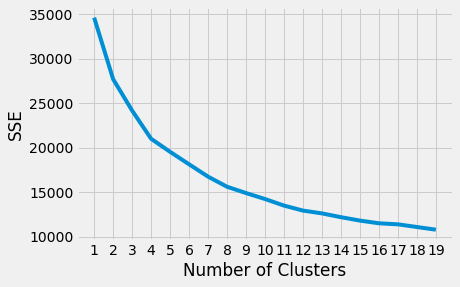

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")


Choosing the Appropriate Number of Clusters with elbow method

In [14]:
from kneed import KneeLocator

In [15]:
kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
)

k = kl.elbow
k

7

In [16]:
kmeans = KMeans(n_clusters=k).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-6.85417818e-03  4.14725400e-01  3.57493843e-01 -2.81597201e-01
  -1.81743010e-01 -8.78939512e-02 -1.96508356e-01  3.11524207e-01
  -1.22454377e-01  4.21156890e-01 -1.94852749e-01  2.95659137e-01
   6.96354378e-03  3.33288922e-01 -2.81956345e-01 -1.72234669e-01
  -5.70435693e-02 -3.87796355e-01 -3.81975174e-01  3.29423005e-01
   2.55112364e-01]
 [-6.29844871e-01  4.14725400e-01 -2.18989538e+00  2.44053237e+00
  -1.03169456e-02 -3.26374420e-02 -2.92210299e-01 -2.13217535e-01
   1.27102884e-01 -6.27462413e-01  2.28834224e-02 -2.63380740e-01
   2.70737845e-01 -2.41443645e-01  3.94085811e+00 -3.36584333e-01
  -9.35896665e-02  6.05219071e-01  6.77558826e-01 -8.24137774e-01
  -5.76322980e-01]
 [ 2.29358878e-01 -1.64368950e+00  1.44584250e+00 -8.45115046e-01
  -2.59440818e-01  1.36239154e+00  3.70733938e+00 -9.82151782e-02
  -1.80311784e-01  8.08686084e-01 -2.62974764e-01  4.53957214e-01
   6.26122516e-01  4.98702536e-01 -3.12388615e-01  3.64758824e+00
   1.49344155e-02 -8.66488530e-01 -8.7

Correlation

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 20
fig = plt.figure()
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()
fig.savefig('corr.png')
